In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset_hosted_url = "https://drive.google.com/file/d/1xxpwaYGWx0iw33FuMe_mAPpnzBhaQZeo/view"
file_path = r'C:\Users\mannu\jupyter\resources\heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)

Describe Age:-
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


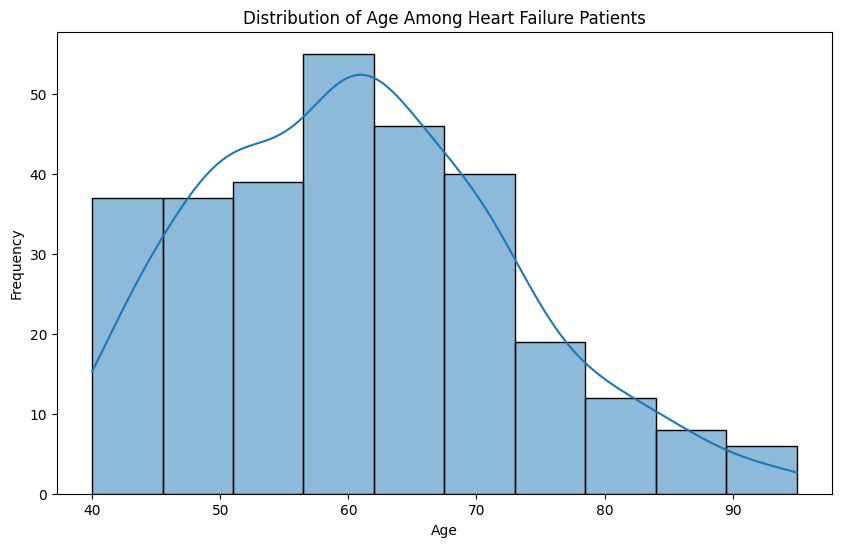

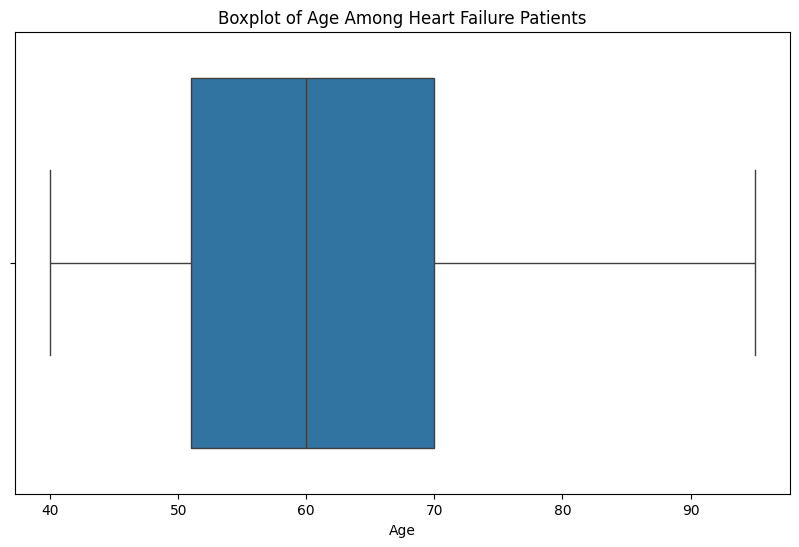

In [39]:
# 1. What is the distribution of age among heart failure patients in the dataset?
print('Describe Age:-')
print(df['age'].describe())

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=10)
plt.title("Distribution of Age Among Heart Failure Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.show()

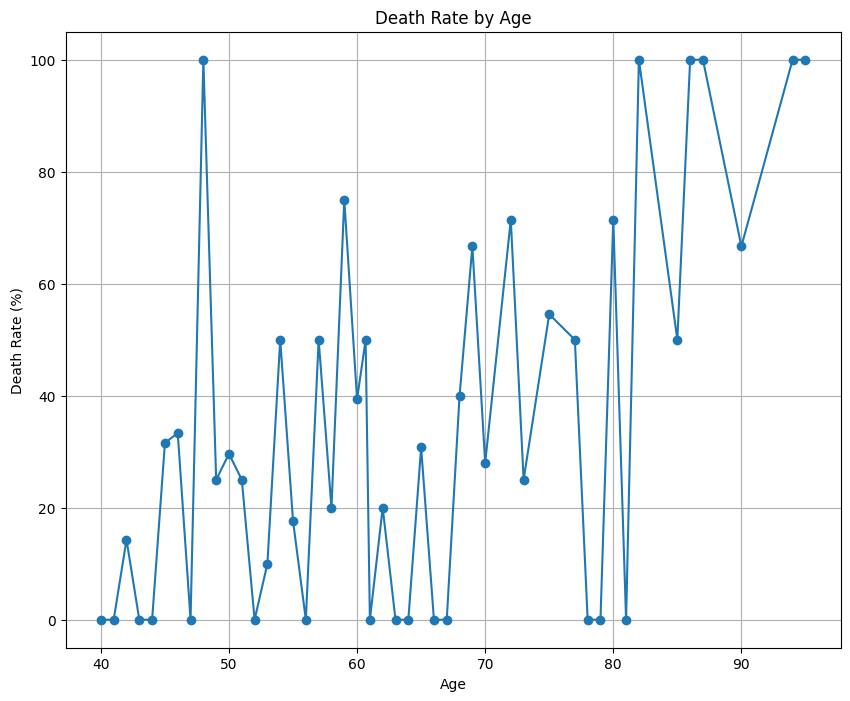

In [47]:
# 2. How does the death rate vary with age?
age_death_rate = df.groupby('age')['DEATH_EVENT'].mean() * 100
plt.figure(figsize=(10,8))
plt.plot(age_death_rate.index, age_death_rate.values, marker='o')
plt.title('Death Rate by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()

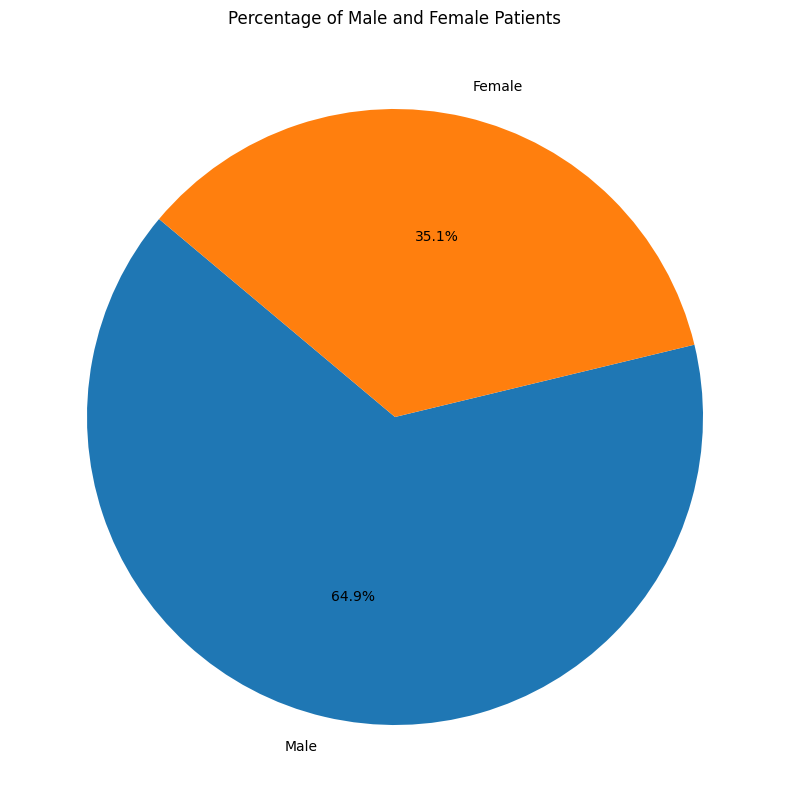

In [63]:
# 3. What is the percentage of male and female patients in the dataset?
gender_counts = df['sex'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100
plt.figure(figsize=(10, 10))
plt.pie(gender_percentage, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Male and Female Patients')
plt.show()

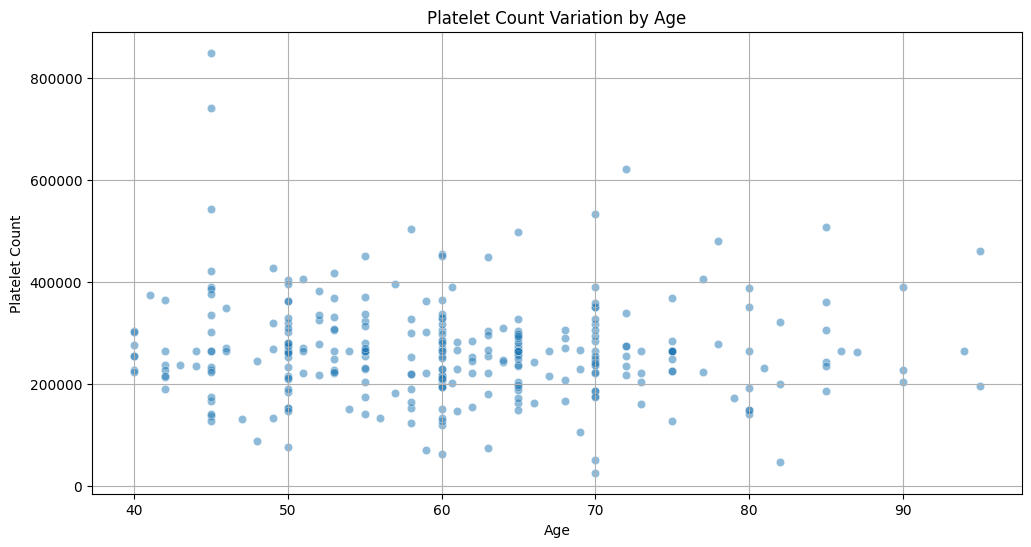

In [60]:
# 4. How does platelet count vary amount different age groups?
# scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='platelets', data=df, alpha=0.5)
plt.title('Platelet Count Variation by Age')
plt.xlabel('Age')
plt.ylabel('Platelet Count')
plt.grid(True)
plt.show()


Correlation coefficient between creatinine and sodium levels: 0.06


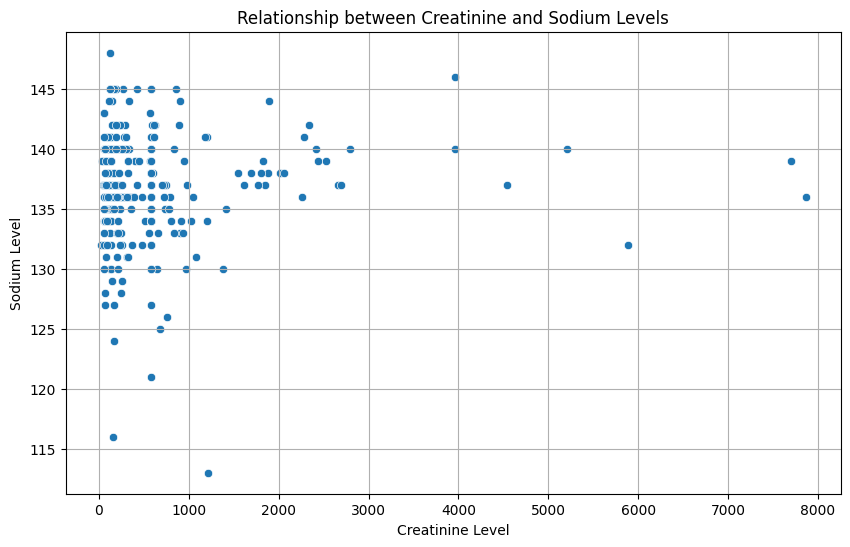

In [69]:
# 5. Is there correlation between creatinine and sodium level in the blood?
correlation = df['creatinine_phosphokinase'].corr(df['serum_sodium'])
print(f'Correlation coefficient between creatinine and sodium levels: {correlation:.2f}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=df)
plt.title('Relationship between Creatinine and Sodium Levels')
plt.xlabel('Creatinine Level')
plt.ylabel('Sodium Level')
plt.grid(True)
plt.show()

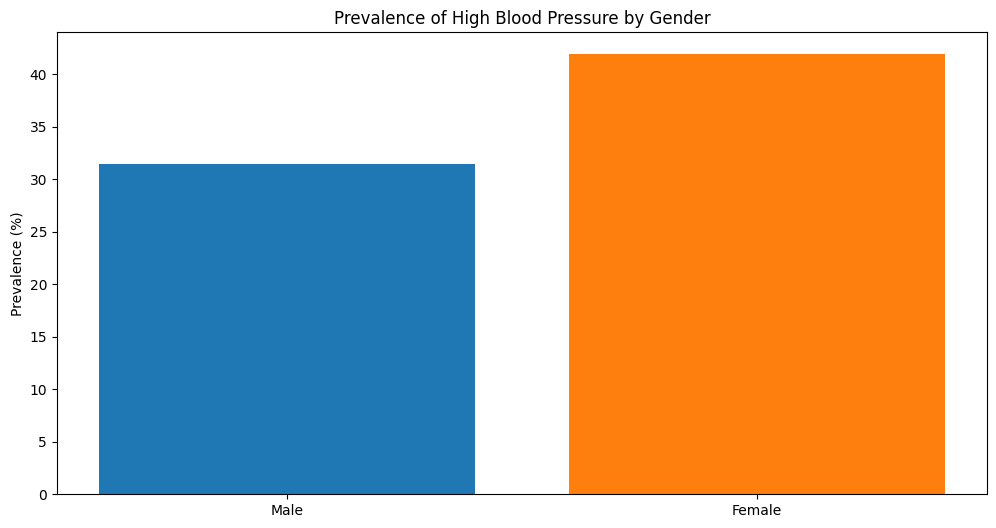

In [73]:
# 6. How does the prevalence of the high blood pressure differs between male and female patient?

# Separate the dataset by gender
male_patients = df[df['sex'] == 1]  # male
female_patients = df[df['sex'] == 0] #female

# Calculate the prevalence of high blood pressure for each gender
male_hbp_prevalence = (male_patients['high_blood_pressure'].mean()) * 100
female_hbp_prevalence = (female_patients['high_blood_pressure'].mean()) * 100

genders = ['Male', 'Female']
prevalences = [male_hbp_prevalence, female_hbp_prevalence]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genders, prevalences, color=['#1f77b4', '#ff7f0e'])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.ylabel('Prevalence (%)')
plt.show()

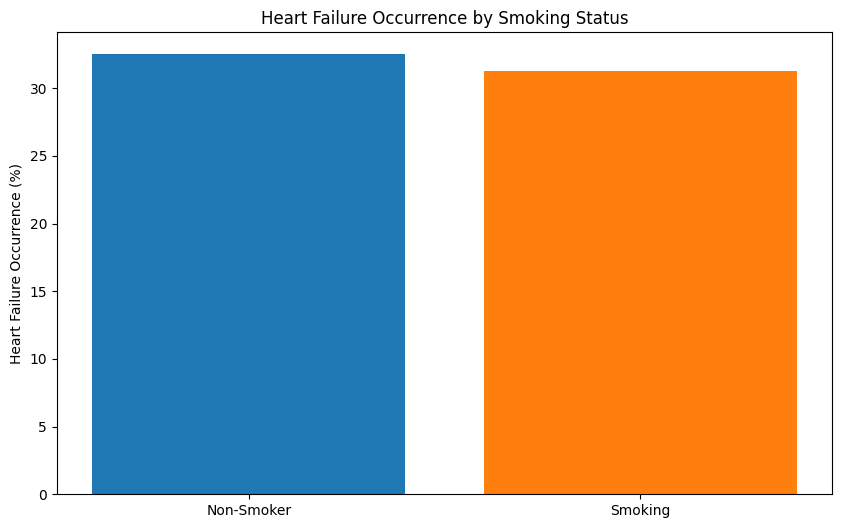

In [76]:
# 7. What is relationship between smoking habits and the occurrence of heart failure?

smoking_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean() * 100
smoking_label = ["Non-Smoker", "Smoking"]
heart_failure_occurrence = smoking_heart_failure.values

plt.figure(figsize=(10,6))
plt.bar(smoking_label, heart_failure_occurrence, color=['#1f77b4', '#ff7f0e'])
plt.title('Heart Failure Occurrence by Smoking Status')
plt.ylabel('Heart Failure Occurrence (%)')
plt.show()

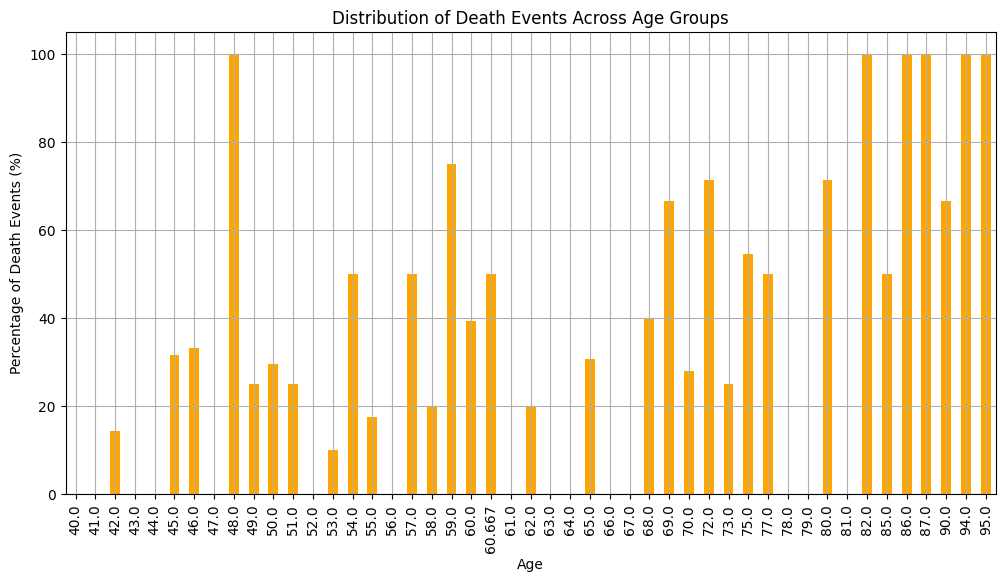

In [78]:
# 8. Are there any noticeable patterns in the distribution of death events across different age group?
age_death_distribution = df.groupby('age')['DEATH_EVENT'].mean() * 100

plt.figure(figsize=(12, 6))
age_death_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Percentage of Death Events (%)')
plt.grid(True)
plt.show()

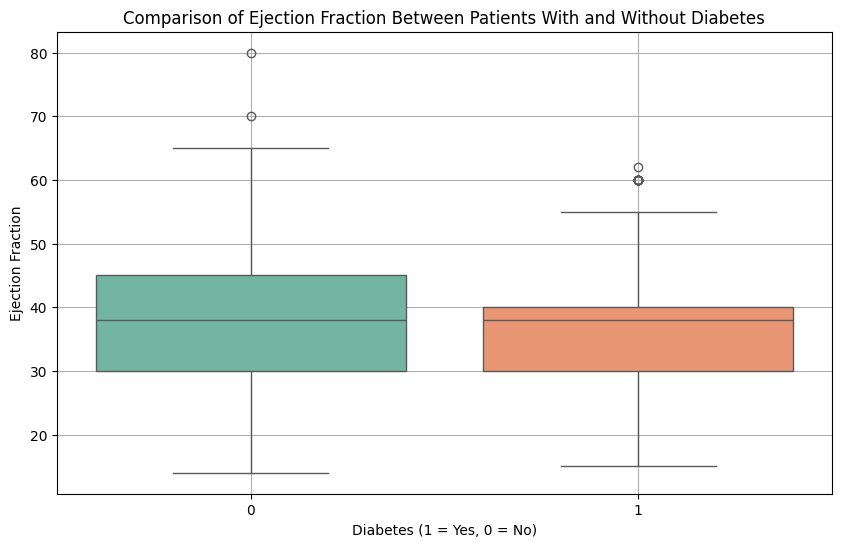

In [84]:
# 9. Is there any significant difference between in ejection fraction between patients with and without diabetes?

plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', hue='diabetes', data=df, palette="Set2", dodge=False, legend=False)
plt.title('Comparison of Ejection Fraction Between Patients With and Without Diabetes')
plt.xlabel('Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Ejection Fraction')
plt.grid(True)
plt.show()

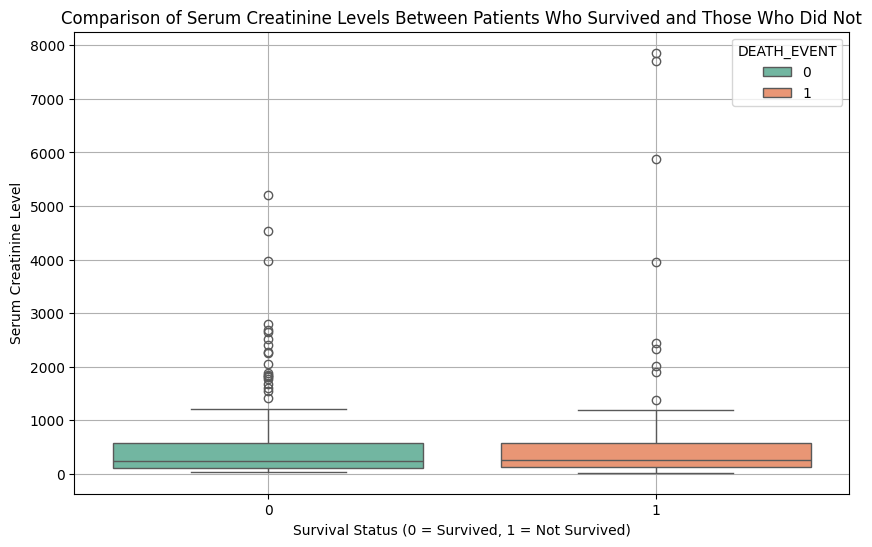

In [91]:
# 10. How does the serum creatinine level vary between patients who survived and those who did not?
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, palette="Set2")
plt.title('Comparison of Serum Creatinine Levels Between Patients Who Survived and Those Who Did Not')
plt.xlabel('Survival Status (0 = Survived, 1 = Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.grid(True)
plt.show()